# Assignment - Data Exploration 2 - Checkpoint 6, Module 14: Model Preparation
### by Jaz Viccarro

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()



In [2]:
edu_df = df.copy()

In [5]:
edu_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?


In [101]:
# group by statement
# t test

results_by_gender = edu_df.groupby('gender').mean()[['math score', 'reading score', 'writing score']].round(0) 
results_by_parent = edu_df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']].round(0) 

results_by_gender = results_by_gender.T.sort_values(by=['male', 'female'], ascending=True)
results_by_parent
results_by_gender['difference'] = results_by_gender['female'] - results_by_gender['male']
# results_by_parent['difference'] = results_by_parent['female'] - results_by_gender['male']
results_by_background = edu_df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']].round(0) 


In [68]:
print(results_by_gender)


gender         female  male  difference
writing score    72.0  63.0         9.0
reading score    73.0  65.0         8.0
math score       64.0  69.0        -5.0


In [100]:
ttest_ind(edu_df[edu_df.gender == 'female'][['math score', 'reading score', 'writing score']],
          edu_df[edu_df.gender == 'male'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

### When grouping by gender, there is a difference in mean.  In writing score and reading score, Females perform better, by 9 annd 8 points, respecitvely.  In Math, Males' score higher by 5 points.
______________________________________________________

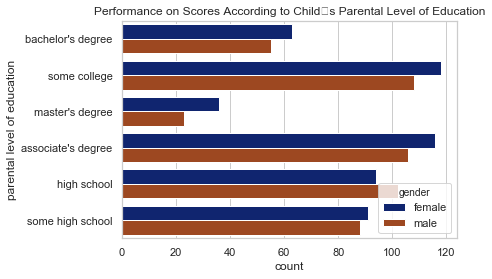

In [151]:
results_by_parent_sorted = results_by_parent.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)
results_by_parent_sorted

sns.countplot(y='parental level of education', hue="gender", data=edu_df, palette="dark")
plt.title('Performance on Scores According to Child\ts Parental Level of Education')

plt.show()

In [109]:
parents = edu_df["parental level of education"].unique()
grouped_df = edu_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            print(
                "t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(ttest_ind(
                edu_df[edu_df["parental level of education"]
                           == parents[i]][var],
                edu_df[edu_df["parental level of education"]
                           == parents[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

### For all categories of scores, those who had a parent with a master's degree performed better.  Those with a parent whose highest level of education was high school performed the poorest.  Our t-test confirms that these differences are significant.

In [105]:
results_by_background = edu_df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']].round(0) 
results_by_background.sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

,math score,reading score,writing score
race/ethnicity,,,
group E,74.0,73.0,71.0
group D,67.0,70.0,70.0
group C,64.0,69.0,68.0
group B,63.0,67.0,66.0
group A,62.0,65.0,63.0


In [111]:
ethnicities = edu_df["race/ethnicity"].unique()
grouped_df = edu_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                edu_df[edu_df["race/ethnicity"]
                           == ethnicities[i]][var],
                edu_df[edu_df["race/ethnicity"] == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


### Per our t-test, the greatest significance falls between ethic groups E and D. This is shown better in our countplot. 

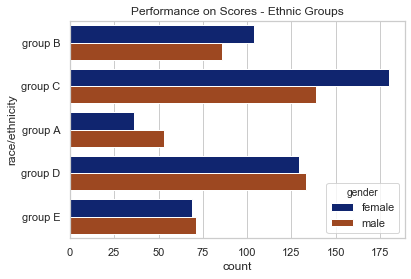

In [150]:
sns.countplot(y="race/ethnicity", hue="gender", data=edu_df, palette='dark')
plt.title('Performance on Scores - Ethnic Groups')

plt.show()

# 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


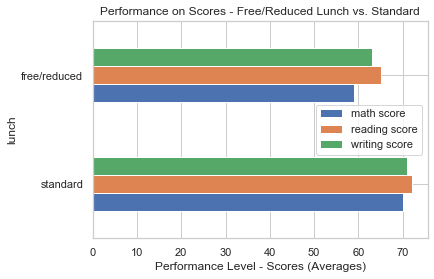

In [149]:
# group by lunch, take avg, order by math, reading, writing

lunch_df = edu_df.groupby('lunch').mean()[['math score', 'reading score', 'writing score']].round(0).sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

lunch_df.plot(kind='barh')
plt.xlabel('Performance Level - Scores (Averages)')
plt.title('Performance on Scores - Free/Reduced Lunch vs. Standard')

plt.legend()
plt.show()

In [124]:
# perform t test
ttest_ind(edu_df[edu_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          edu_df[edu_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Our table shows us the averages for scores for the categories standard and free/reduced.  In all test subsets, those in the 'standard' group perform better across all categories.

Our t-test confirms that these differences are significant. 

# 3. Does the test preparation course seem to have an effect on the exam performances?

In [154]:
#group by test prep course, take avg, by math, reading,writing

prep_course = edu_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]
prep_course.round(0).sort_values(by=['math score', 'reading score', 'writing score'], ascending=False)

,math score,reading score,writing score
test preparation course,,,
completed,70.0,74.0,74.0
none,64.0,67.0,65.0


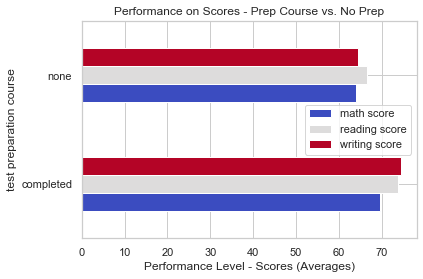

In [153]:
prep_course.plot(kind='barh', sort_columns=True, colormap='coolwarm')
plt.xlabel('Performance Level - Scores (Averages)')
plt.title('Performance on Scores - Prep Course vs. No Prep')
plt.legend()
plt.show()

In [152]:
# t test
ttest_ind(edu_df[edu_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          edu_df[edu_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

### Our table shows that those who completed a prep course outperformed those who did not take a prep course in all test categories. Our chart shows us the disparatiy between those who completed a prep course and those who did not.  After performing a t-test, we can see that these disparaties are in fact statistically significant. 

# 4. Which 2 exam scores are most correlated with each other?


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


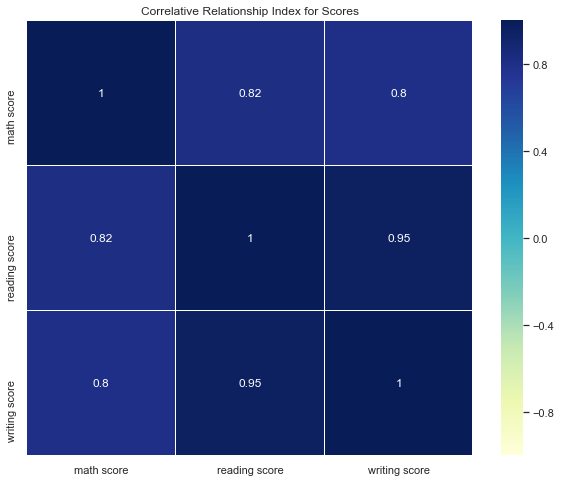

In [170]:
corr_df = edu_df[["math score", "reading score", "writing score"]].corr()
print(corr_df)

# help(sns.heatmap)
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_df,
            vmin=-1,
            vmax=1,
            cmap='YlGnBu',
            center=0,
            linewidths=0.5,
            annot=True);
plt.title('Correlative Relationship Index for Scores')
plt.show()

## Writing and Reading are the most highly positively correlated to each other.  The second most correlated set of scores is Reading and Math, which are also positively correlated. 